<a href="https://colab.research.google.com/github/yugal1Sahu/Medical_Insurance_Cost_prediction_20191CSE0717/blob/main/Medical_Insurance_Cost_prediction_20191CSE0717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data  = pd.read_csv('/insurance.csv')


Displaying top 5 dataset-->

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Displaying last 5 dataset-->

In [8]:
data.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [9]:
data.shape

(1338, 7)

In [10]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [11]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

Checking null values--->

In [12]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

We have 0 missing values which is very good. Now let's do EDA (Exploratory data analysis).First we'll see how the charges are distributed according to given factors

Text(0.5, 1.0, 'Distribution of Charges')

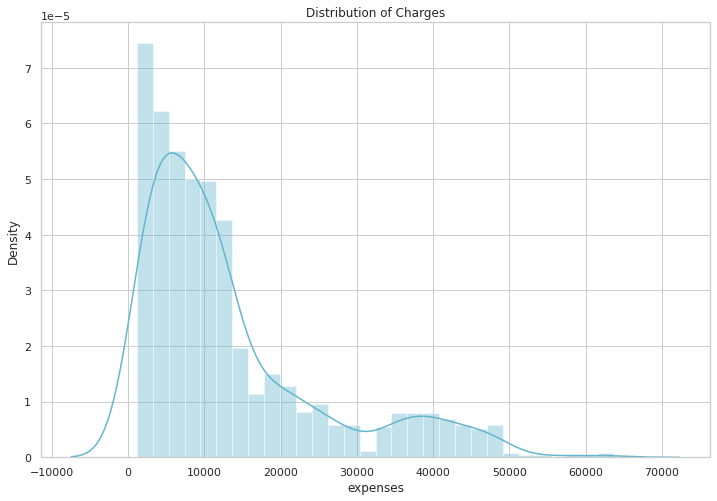

In [13]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(data['expenses'], kde = True, color = 'c')
plt.title('Distribution of Charges')

This distribution is right-skewed. To make it closer to normal we can apply natural log

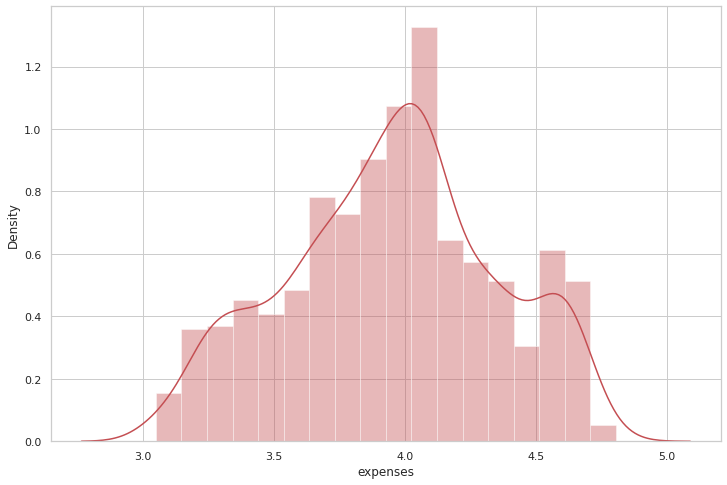

In [14]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(data['expenses']), kde = True, color = 'r' )

Now let's look at the charges by region

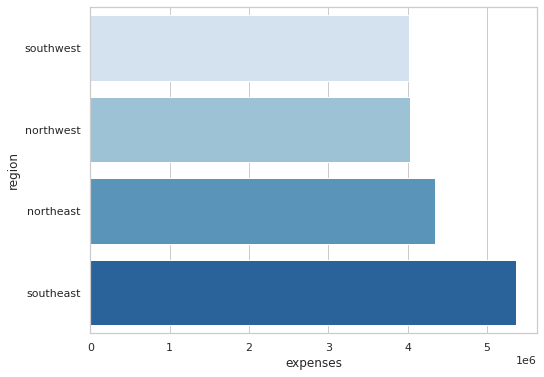

In [15]:
expenses = data['expenses'].groupby(data.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(expenses.head(), expenses.head().index, palette='Blues')

So overall the highest medical charges are in the Southeast and the lowest are in the Southwest. Taking into account certain factors (sex, smoking, having children) let's see how it changes by region

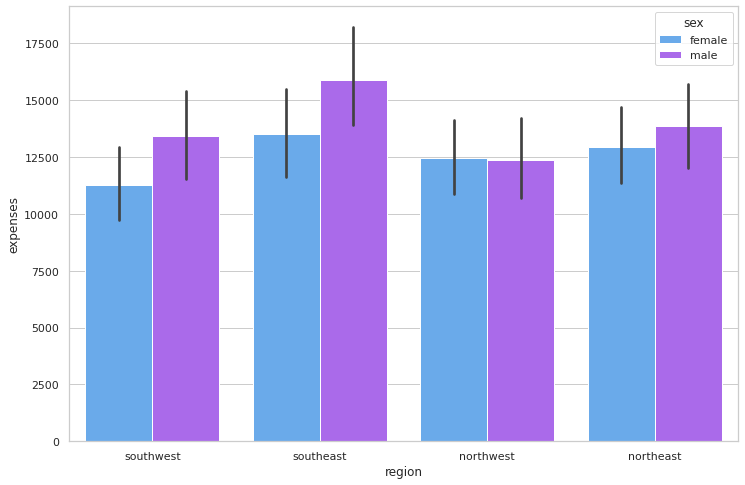

In [16]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='expenses', hue='sex', data=data, palette='cool')

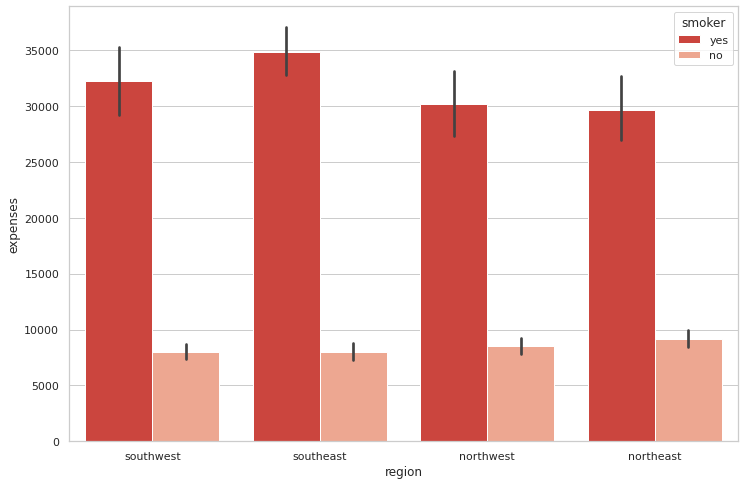

In [17]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'expenses',
                 hue='smoker', data=data, palette='Reds_r')

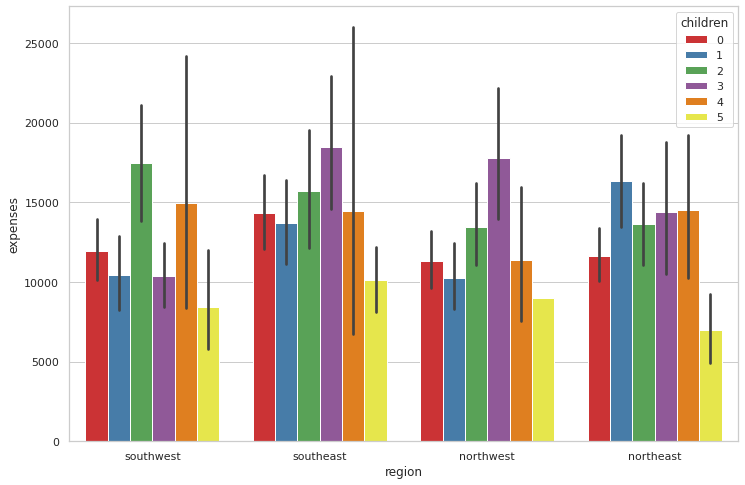

In [18]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='expenses', hue='children', data=data, palette='Set1')

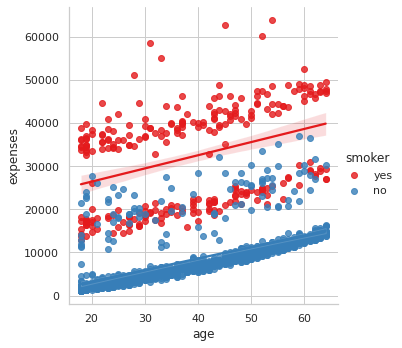

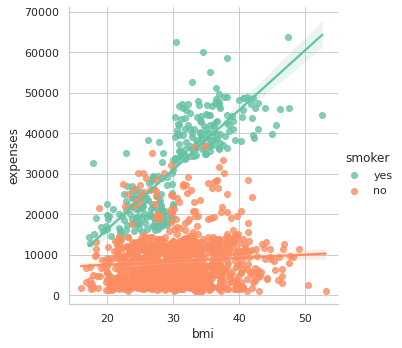

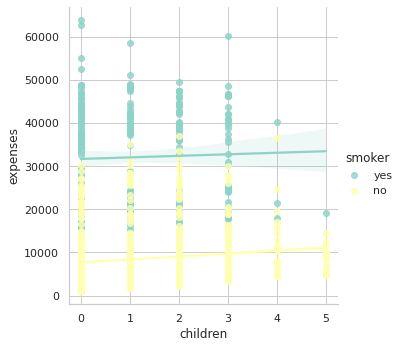

In [19]:
ax = sns.lmplot(x = 'age', y = 'expenses', data=data, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'expenses', data=data, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'expenses', data=data, hue='smoker', palette='Set3')

--------------------Exploratory Data Analysis------------------------------

In [20]:
##Converting objects labels into categorical
data[['sex', 'smoker', 'region']] = data[['sex', 'smoker', 'region']].astype('category')
data.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

In [21]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex = label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker = label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region = label.transform(data.region)
data.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
expenses    float64
dtype: object

In [22]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


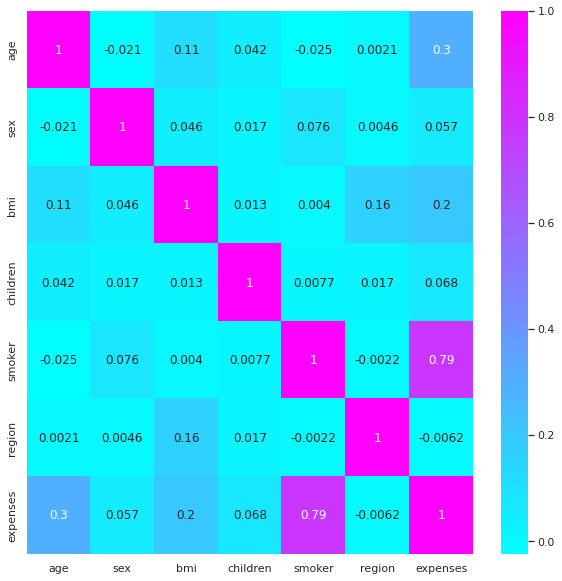

In [23]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(data.corr(), annot=True, cmap='cool')

No correlation, except with the smoking

Now performing linear regression in the given dataset------->

***Linear*** ***Regression***

In [24]:
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [25]:
x = data.drop(['expenses'], axis = 1)
y = data['expenses']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11663.165438316819
[  253.96534178   -24.55552531   328.44727833   444.00441091
 23567.59812625  -288.36371592]
0.7999053396503137


The result we got is good enough, but we can try to improve it a bit by reducing unimportant features later

***Ridge Regression***

In [26]:
#Rigde Regression
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(x_test, y_test))

-11644.655459761243
[ 2.53867192e+02 -2.17424263e+01  3.28385403e+02  4.44513379e+02
  2.34996902e+04 -2.88884033e+02]
0.7997294610659682


***Lasso Regression***

In [27]:
#Lasso
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(x_test, y_test))

-11663.020875886219
[  253.96492291   -23.68796788   328.4341174    443.86254424
 23566.33224193  -288.19546248]
0.7998996495359558


***Random Forest Regressor***


Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression

In [28]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = data.drop(['expenses'], axis=1)
y = data.expenses
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))

MSE train data: 3632055.662, MSE test data: 19586063.469
R2 train data: 0.971, R2 test data: 0.879


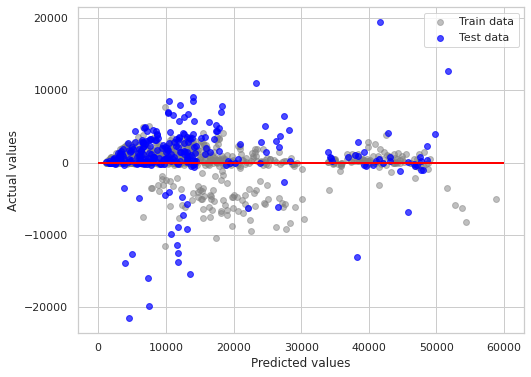

In [29]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values') 
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

Feature importance ranking shows the contribution of each

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.217664)
3.age(0.137279)
4.children(0.021401)
5.region(0.015616)
6.sex(0.006362)


<BarContainer object of 6 artists>

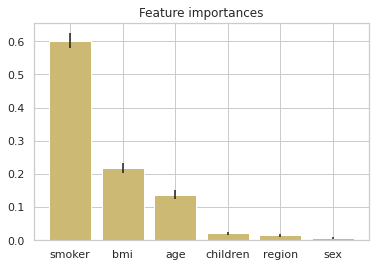

In [30]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]] 
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [31]:
from sklearn.preprocessing import PolynomialFeatures
x = data.drop(['expenses', 'sex', 'region'], axis = 1)
y = data.expenses
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)
x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)
y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(x_test, y_test))

-5354.647391939741
[ 0.00000000e+00 -4.04155050e+01  5.25877542e+02  8.56502619e+02
 -9.52975693e+03  3.04158571e+00  1.85984456e+00  6.04041172e+00
  3.92334477e+00 -9.43186301e+00  3.64323641e+00  1.40859638e+03
 -1.46059782e+02 -4.43010212e+02 -9.52975693e+03]
0.8813638733784411


In [32]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2823.3592617761033
Mean Squared Error: 18878562.43417711
Root Mean Squared Error: 4344.946770005026


In [33]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
data

,Actual,Predicted
578,9724.53,12102.729417
610,8547.69,10444.347881
569,45702.02,48577.485021
1034,12950.07,14140.096817
198,9644.25,8640.559661
...,...,...
1084,15019.76,16713.701874
726,6664.69,8655.951883
1132,20709.02,12370.700280
725,40932.43,41525.430368
